# **Use CASCADE to infer spiking activity for your own data**
---

<font size = 3>This is a demo script for the inference of spiking activity from calcium imaging data.

<font size = 3>The function **load_neurons_x_time()** loads the input data as a matrix. It can
be modified by the user to load npy-files, mat-files or any other standard format.

<font size = 3>After loading the dF/F data, some example traces are plotted.
    
<font size = 3>The line **spike_rates = cascade.predict( model_name, traces )** performs the
predictions. As input, it uses the loaded calcium recordings ('traces') and
the pretrained model ('model_name'). To train a new model (usually not necessary), check out the companion Jupyter notebook.    
    
<font size = 3>The output is a matrix with the inferred spike rates.
    
---

## 1. Import python packages

<font size = 3> Imports standard python packages, and the main CASCADE packages (cascade2p).

In [2]:
import os

if 'Notebooks' in os.getcwd(): os.chdir('..')  # change to main directory
print('Current directory: {}'.format( os.getcwd() ))

import numpy as np
import matplotlib.pyplot as plt
import glob
import scipy.io as sio

# local folder
from cascade2p import cascade
from cascade2p.utils import plot_dFF_traces
from cascade2p import checks
checks.check_packages()


Current directory: /home/pierre/Desktop/git_env/Calibrated-inference-of-spiking
	YAML reader installed (version 0.16.10).
	Keras installed (version 2.1.6).
	Tensorflow installed (version 1.13.1).


## 2. Load your own calcium imaging data

### Define your own function to load data as 2d array (neurons, time)

<font size = 3>The function should return a 2D array (neurons x time) with dF/F values (numeric values, not percent).
    
<font size = 3>Sometimes data are in a different format (time x neurons) or dF/F values are given in percent. In this case, correct by transposing the data (*traces = traces.T*) or by converting from percent to numeric (*traces = traces / 100*).

In [4]:
def load_neurons_x_time(file_path):
    """Custom method to load data as 2d array with shape (neurons, nr_timepoints)"""
    
    # replace this with your own code if necessary
    # traces = np.load(file_path)
    
    # # here numpy dictionary with key 'dff'
    traces = np.load(file_path, allow_pickle=True).item()['dff']
    
    return traces

def load_neurons_x_time(file_path):
    """Custom method to load data as 2d array with shape (neurons, nr_timepoints)"""
    
    traces = sio.loadmat(file_path)['dF_traces'] 
    
    return traces.T/100

### Verify that the data were loaded correctly

Important: modify folder name (*example_file*) and imaging frame rate (*frame_rate*)!

Number of neurons in dataset: 1005
Number of timepoints in dataset: 260


<IPython.core.display.Javascript object>


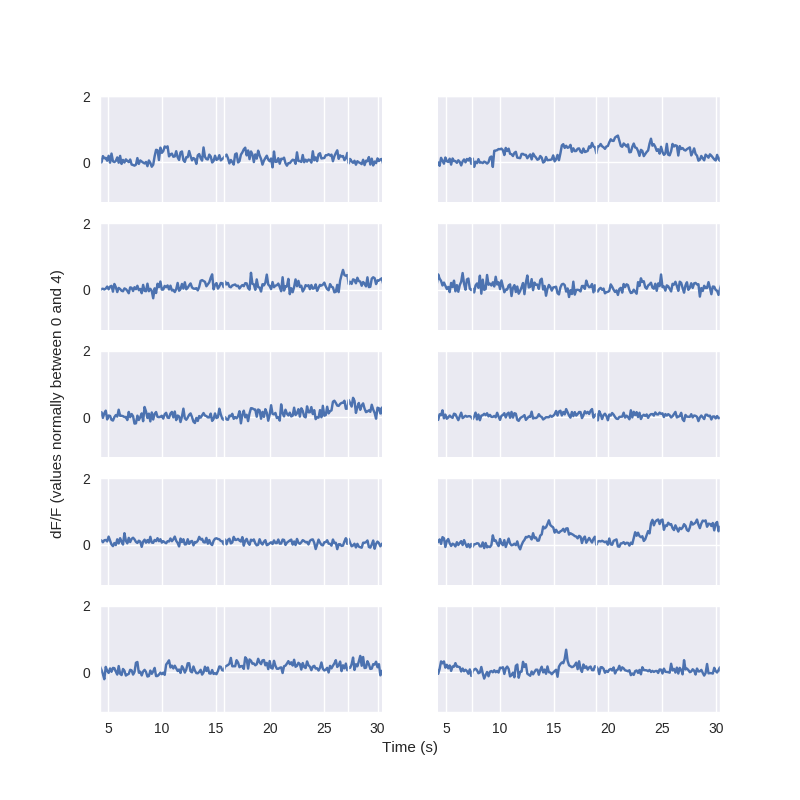

In [27]:
example_file = 'data/Jaguar_21_dff_nmf.npy'      # enter your test file here
example_file = 'Example_datasets/Multiplane-OGB1-zf-pDp-Rupprecht-7.5Hz/Calcium_traces_04.mat'

traces = load_neurons_x_time( example_file )
frame_rate = 7.5


print('Number of neurons in dataset:', traces.shape[0])
print('Number of timepoints in dataset:', traces.shape[1])

# interactive plotting
%matplotlib notebook

plt.rcParams['figure.figsize'] = (8.0, 8.0)
neuron_indices = np.random.randint(traces.shape[0], size=10)
plot_dFF_traces(traces,neuron_indices,frame_rate)

## 3. Infer spike rates from calcium data 

### Load pretrained model

In [8]:
model_name = 'GCaMP6s_5Hz'
traces_file_name = 'data/Jaguar_21_dff_nmf.npy'  # enter your test file here
traces_file_name = 'Example_datasets/Multiplane-OGB1-zf-pDp-Rupprecht-7.5Hz/Calcium_traces_04.mat'

traces = load_neurons_x_time( traces_file_name )


### Predict spike rates

In [ ]:
spike_rates = cascade.predict( model_name, traces )

## 4. Save results to a data file

In [7]:
folder = os.path.dirname(traces_file_name)
save_path = os.path.join(folder, 'full_prediction_'+os.path.basename(traces_file_name))

# save as numpy file
np.save(save_path, spike_rates)

# save as .mat file
# import scipy
# scipy.io.savemat(save_path, {'spike_rates': spike_rates})

## 5. Plot the results together with calcium traces

In [ ]:
plt.rcParams['figure.figsize'] = (8.0, 8.0)
neuron_indices = np.random.randint(traces.shape[0], size=10)
plot_dFF_traces(traces,neuron_indices,frame_rate,spike_rates)